<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/PCA_question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [17]:
wine = load_wine()
X = wine.data
y = wine.target

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [20]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_baseline = log_reg.predict(X_test)


In [21]:

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='macro')
recall_baseline = recall_score(y_test, y_pred_baseline, average='macro')

In [22]:
print(f"Baseline Accuracy: {accuracy_baseline}")
print(f"Baseline Precision: {precision_baseline}")
print(f"Baseline Recall: {recall_baseline}")


Baseline Accuracy: 0.9814814814814815
Baseline Precision: 0.9777777777777779
Baseline Recall: 0.9841269841269842


In [23]:
components = [2, 5, 10]
accuracies = []
precisions = []
recalls = []


In [24]:
for n_components in components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    log_reg_pca = LogisticRegression()
    log_reg_pca.fit(X_train_pca, y_train)
    y_pred_pca = log_reg_pca.predict(X_test_pca)

    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='macro')
    recall_pca = recall_score(y_test, y_pred_pca, average='macro')

    accuracies.append(accuracy_pca)
    precisions.append(precision_pca)
    recalls.append(recall_pca)

    print(f"\nPCA with {n_components} Components:")
    print(f"Accuracy: {accuracy_pca}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")


PCA with 2 Components:
Accuracy: 0.9629629629629629
Precision: 0.9710144927536232
Recall: 0.9649122807017544

PCA with 5 Components:
Accuracy: 0.9629629629629629
Precision: 0.9595238095238096
Recall: 0.9603174603174603

PCA with 10 Components:
Accuracy: 0.9814814814814815
Precision: 0.9777777777777779
Recall: 0.9841269841269842


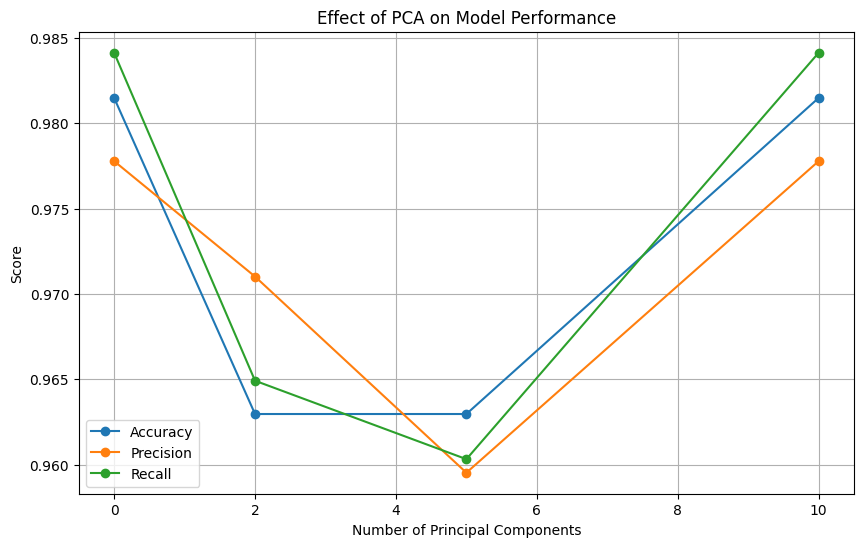

In [25]:
plt.figure(figsize=(10, 6))
plt.plot([0] + components, [accuracy_baseline] + accuracies, label='Accuracy', marker='o')
plt.plot([0] + components, [precision_baseline] + precisions, label='Precision', marker='o')
plt.plot([0] + components, [recall_baseline] + recalls, label='Recall', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Effect of PCA on Model Performance')
plt.legend()
plt.grid()
plt.show()